# Deep Learning Key Components & Pytorch Class

## Overview

딥러닝 모델 구현에 필요한 4가지의 중요한 요소는 아래와 같다: 
1. Data
2. Model
3. Loss Function
4. Optimization

> 우리는 위 요소들을 Pytorch 에서 제공하는 Class 를 통해 쉽게 구현할 수 있다.


#### Pytorch 의 딥러닝 학습 Flow
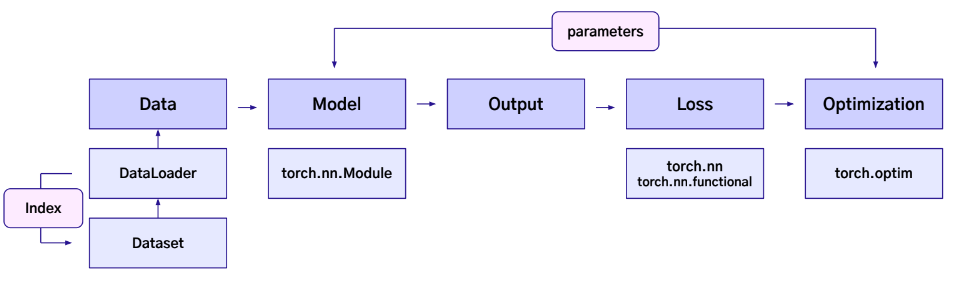







### Dataset 과 DataLoader 를 사용한 데이터 로드

> ***Dataset*** 과 ***DataLoader*** 를 사용하면, 데이터 셋에서 `미니 배치(mini-batch)` 크기의 데이터를 반환한다.

#### Dataset
> 단일 데이터를 처리하여 반환하는 작업을 수행하는 역할
- ***Dataset*** 은 단일 데이터를 모델의 입력으로 사용할 수 있는 형태(tensor)로 변환하는 작업을 수행한다.
- pytorch 에서 흔히 사용되는 데이터셋에 대한 Dataset 구현체가 있지만, 많은 경우 직접 데이터셋을 구축해야 한다.

##### `Custom dataset` 구현:
- 반드시 작성해야하는 세 가지 메서드:
    - `__init__`: ***Dataset*** 객체가 생성될 때 한 번 실행되며, 주로 데이터 셋을 불러오고 필요한 변수를 선언한다.
    - `__getitem__`: 주어진 인덱스에 해당하는 단일 데이터를 불러오고 반환한다.
        - ***DataLoader*** 에서 데이터 셋의 데이터를 로드하는 순서를 의미하는 인덱스를 ***Dataset***에 인자로 주어, 데이터 셋의 위치에 해당하는 데이터를 가져온다.
        - **[데이터 타입]** 반환하는 데이터는 list, tuple, dictionary 로 반환할 수도 있다. 이경우 list, tuple 의 원소가 tensor 이며 dictinary 는 value 가 tensor 이다.
        - **[데이터 차원]**: 반환되는 모든 데이터의 차원의 크기가 동일해야 한다.
    - `__len__`: 데이터 셋의 데이터 개수를 반환한다.

#### DataLoader
> 데이터를 미니 배치로 묶어서 반환하는 역할
- 인자로 주어진 ***Dataset***을 이용하여, 데이터셋의 단일 데이터들을 정해진 개수만큼 모아 미니 배치를 구성하는 역할을 한다.
- 주요 parameters:
    - batch_size [int, default=1]: 미니배치의 크기를 나타낸다.
    - shuffle [bool, default=False]: epoch 마다 데이터의 순서가 섞이는 여부를 나타낸다.
    - num_workers [int, default=0]: 데이터 로딩에 사용하는 서브 프로세스 개수를 나타낸다.
        - 커질수록 CPU, Memory 등 리소스 사용량 증가.
    - drop_last [bool, default=False]: 마지막 미니 배치의 데이터 수가 미니 배치 크기보다 작은 경우, 데이터를 버릴지 말지를 나타낸다.


In [ ]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self):
        pass

    def __getitem__(self, idx):
        pass

    def __len__(self):
        pass

### Model
> PyTorch는 다양한 모델을 제공한다.
- Torchvision
    - 이미지 분석에 특화된 Pre-trained 다양한 모델을 제공한다.
    - [Torchvision문서](https://pytorch.org/vision/stable/models.html)에서 여러 모델의 목록을 확인하고 불러오는 방법을 확인할 수 있다.
- PyTorch Hub
    - CV, audi, generative, NLP 도메인의 모델들이 공개되어 있다.
    
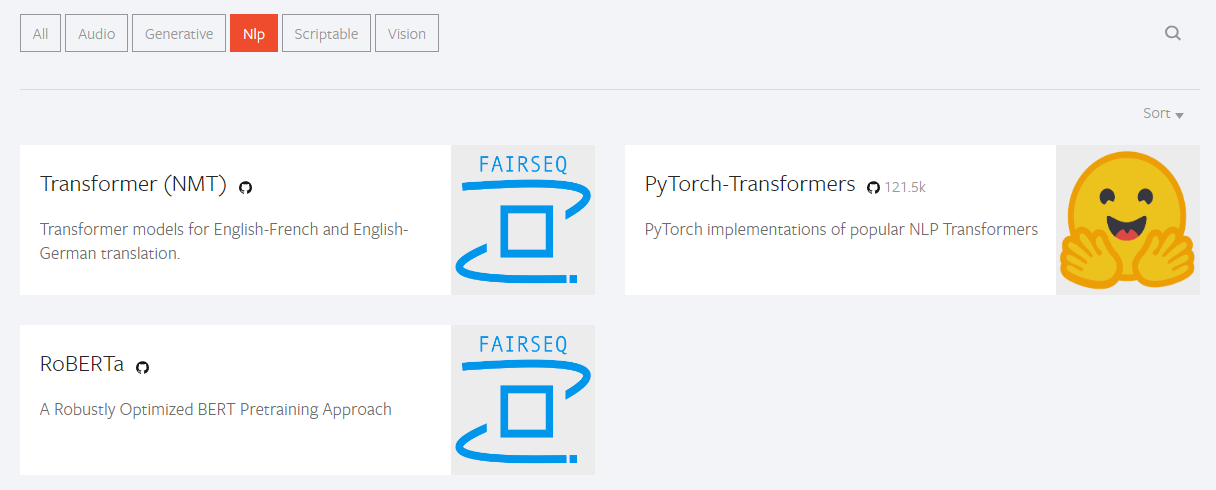

In [ ]:
import torchvision
import torch

model = torchvision.models.resnet50()
model = torch.hub.load('pytorch/vision', 'resnet50')

#### `Custom Model`
- 다만 pytorch 에 공개된 모델은 제한적이며, 새로운 모델이 지속해서 연구 및 발표된다.
- 새로운 모델을 빠르게 접하고 상황에 맞게 변형해서 사용하기 위해 pytorch 에서 모델을 어떻게 정의하고 사용하는지 이해해야한다.

##### Custom Model 의 기본 구조
- `torch.nn.Module` 클래스를 상속받아 정의한다.
- 필수 두 가지 메서드:
    - `__init__`: `super().__init__()` 을 통해 부모 클래스(nn.Module)를 초기화한 후, 모델의 레이어와 파라미터를 초기화.
    - `forward`: 입력 데이터에 대한 연산을 정의

### 역전파와 최적화


#### Pytorch 에서 사용되는 훈련 과정의 일반적인 형태

1. `optimizer.zero_grad()`: 이전 gradient 를 '0' 으로 설정
    - pytorch 는 기본적으로 gradient 를 누적하여 사용하기 때문에, batch 의 step 마다 초기화를 시켜준다.
2. `output = model(data)`: 모델을 사용하여 입력값(데이터)에 대한 연산
3. `loss=loss_function(output, label)`: loss 값 계산
4. `loss.backward()`: loss 에 대한 gradient 를 자동으로 계산
5. `optimizer.step()`: 계산된 gradient 를 사용하여 각 파라미터를 업데이트

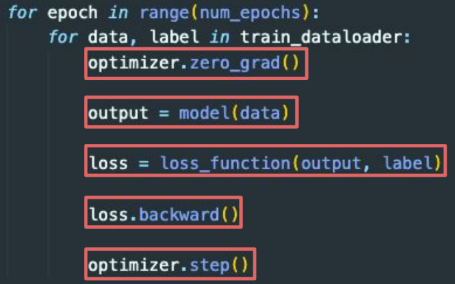

### 추론과 평가

#### Inference
> 학습한 모델을 이용하여, 입력 데이터에 대한 예측과 결과를 내놓는 과정
- 일반적으로 inference 시에는  `model.eval()` 과 `torch.no_grad()`를 함께 사용한다.
    - `model.eval()`: 모델을 evaluation 모드로 전환한다.
        - 모델의 특정 레이어(dropout, batchnorm)이 학습과정과 추론과정에서 다르게 작동해야하기 때문
    - `torch.no_grad()`: AutoGrad 기능을 비활성화
        - 메모리사용량을 줄이고 계산 속도를 향상시킨다.

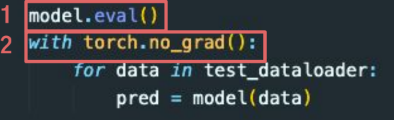

#### Evaluation
- Inference 과정에서 도출한 예측 결과와 실제 라벨을 비교하여 모델의 성능을 평가한다.